***Marcin Ryznar, 405745***

In [10]:
#import bibliotek
import pandas as pd
from matplotlib import pyplot as plt

#link do ścieżki danych
DATA = 'D:\Marcin\STUDIA\Automatyka i Robotyka\Semestr 5\Analiza i bazy danych\Lab. 6\lab6\Analysis Data/'

*Wyświeldanie wszystkich oryginalnych danych*

In [11]:
#df - data frame, dane pobierane z oryginalnego pliku
df = pd.read_csv(f'{DATA}12_sw_original.csv', sep=',')
#zamieniam wartosci na 0
#df_2 = df.fillna(0)
print(df)

     Unnamed: 0  Dni od zakupu       Marka  Wiek kupującego Płeć kupującego  \
0             0              7        Beko             33.0               M   
1             1              7        Beko             55.0             bd.   
2             2             10        Beko             50.0               M   
3             3             11       Tefal             36.0               M   
4             4              3        Beko             62.0               K   
..          ...            ...         ...              ...             ...   
461         461              8        Beko             19.0               M   
462         462              9  Electrolux             50.0               K   
463         463              9        Beko              NaN               K   
464         464              5       Tefal             41.0               M   
465         465             11        Beko             61.0               M   

     Ocena  
0      3.0  
1      3.0  
2      2.0  

Wypisanie wszystkich firm oraz ilość klientów

         Marka  Wiek kupującego  Ocena
0         Beko             33.0    3.0
3        Tefal             36.0    2.5
5   Electrolux             46.0    2.5
18     Samsung             34.0    3.0
48       Dyson              NaN    3.0 

Ilość klientów:
   Plec  Liczba
0    M     238
1    K     130
2  bd.      98


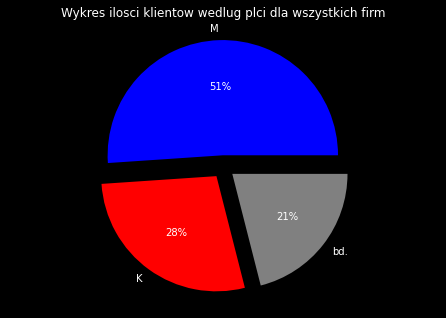

In [12]:
#wybieram kolumne firm
df_firm = df[['Marka', 'Wiek kupującego', 'Ocena']]
df_m = df_firm.drop_duplicates(subset='Marka') #usuwam duplikaty występujące w kolumnie
sum_f = df[['Płeć kupującego']]
print(df_m, '\n')

#Ilość wszystkich klientów
plec_ = df['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla wszystkich firm')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'

***Marka Beko*** 

*Ilość klientów ze względu na płęć*

    Marka Płeć kupującego  Ocena
0    Beko               M    3.0
2    Beko               M    2.0
6    Beko               M    2.0
10   Beko               M    3.5
17   Beko               M    3.0
..    ...             ...    ...
455  Beko               M    1.0
456  Beko               M    1.0
457  Beko               M    2.5
461  Beko               M    2.5
465  Beko               M    1.0

[163 rows x 3 columns]
    Marka Płeć kupującego  Ocena
4    Beko               K    2.5
12   Beko               K    1.5
14   Beko               K    3.0
31   Beko               K    3.0
33   Beko               K    0.5
..    ...             ...    ...
415  Beko               K    4.0
417  Beko               K    1.0
428  Beko               K    3.5
458  Beko               K    4.0
463  Beko               K    2.0

[89 rows x 3 columns]
Średnia ocena firmy wedlug kobiet: 2.460674157303371
Średnia ocena firmy wedlug mezczyzn: 2.441717791411043


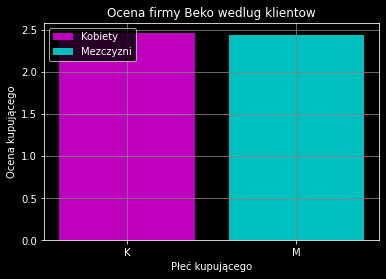

Ilość klientów BEKO:
   Plec  Liczba
0    M     163
1    K      89
2  bd.      71


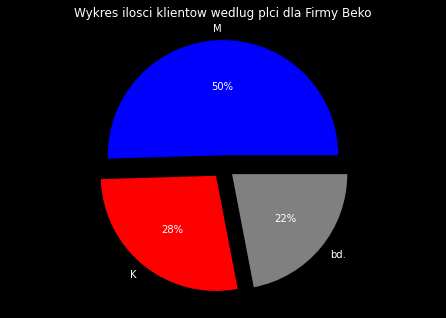

In [13]:
df_fm = df[['Marka', 'Płeć kupującego', 'Ocena']]
d_beko = df_fm[df_fm ['Marka'] == 'Beko']

d_male = d_beko[d_beko ['Płeć kupującego'] == 'M']
d_female = d_beko[d_beko['Płeć kupującego'] == 'K']
print(d_male)
print(d_female)
d_male.to_csv(path_or_buf=f"{DATA}BEKO_male_ocena.csv", sep=",") #zapis do pliku csv
d_female.to_csv(path_or_buf=f"{DATA}BEKO_female_ocena.csv", sep=",") #zapis do pliku csv

#Średnia ocena klientow
sr_k = d_female['Ocena'].mean()
sr_m = d_male['Ocena'].mean()
print('Średnia ocena firmy wedlug kobiet:', sr_k)
print('Średnia ocena firmy wedlug mezczyzn:', sr_m)


# #Wykres dla beko
plt.bar(d_female['Płeć kupującego'], d_female['Ocena'].mean(),color = 'm', label = 'Kobiety')
plt.bar(d_male['Płeć kupującego'], d_male['Ocena'].mean(), color = 'c', label = 'Mezczyzni')

plt.title("Ocena firmy Beko wedlug klientow")
plt.ylabel("Ocena kupującego")
plt.xlabel("Płeć kupującego")
plt.grid(color = 'grey')
plt.legend()
plt.show()


#Wykres od ilosci osób
#Ilość wszystkich klientów
plec_ = d_beko['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów BEKO:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}BEKO_ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla Firmy Beko')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'


***Marka Tefal*** 

*Ilość klientów ze względu na płęć*

     Marka Płeć kupującego  Ocena
3    Tefal               M    2.5
11   Tefal               M    2.0
15   Tefal               M    3.0
20   Tefal               M    2.5
25   Tefal               M    1.5
32   Tefal               M    4.0
40   Tefal               M    1.5
45   Tefal               M    1.0
75   Tefal               M    1.0
78   Tefal               M    1.0
98   Tefal               M    1.5
100  Tefal               M    2.5
116  Tefal               M    0.5
126  Tefal               M    1.5
131  Tefal               M    1.5
164  Tefal               M    1.0
175  Tefal               M    2.0
223  Tefal               M    3.0
238  Tefal               M    1.5
291  Tefal               M    0.5
308  Tefal               M    1.5
372  Tefal               M    2.5
386  Tefal               M    3.5
459  Tefal               M    2.0
464  Tefal               M    3.0
     Marka Płeć kupującego  Ocena
30   Tefal               K    1.0
87   Tefal               K    1.5
139  Tefal    

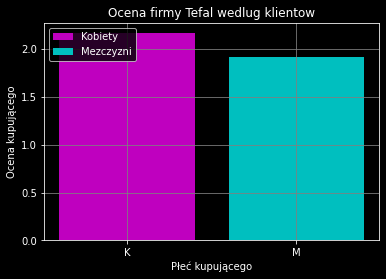

Ilość klientów TEFAL:
   Plec  Liczba
0    M      25
1    K      15
2  bd.       8


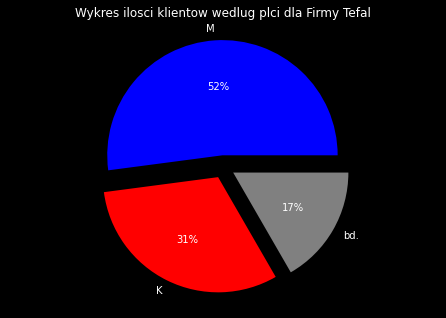

In [14]:
df_fm = df[['Marka', 'Płeć kupującego', 'Ocena']]
d_tefal = df_fm[df_fm ['Marka'] == 'Tefal']

d_male = d_tefal[d_tefal ['Płeć kupującego'] == 'M']
d_female = d_tefal[d_tefal['Płeć kupującego'] == 'K']
print(d_male)
print(d_female)
d_male.to_csv(path_or_buf=f"{DATA}TEFAL_male_ocena.csv", sep=",") #zapis do pliku csv
d_female.to_csv(path_or_buf=f"{DATA}TEFAL_female_ocena.csv", sep=",") #zapis do pliku csv

#Średnia ocena klientow
sr_k = d_female['Ocena'].mean()
sr_m = d_male['Ocena'].mean()
print('Średnia ocena firmy wedlug kobiet:', sr_k)
print('Średnia ocena firmy wedlug mezczyzn:', sr_m)


# #Wykres dla Tefal
plt.bar(d_female['Płeć kupującego'], d_female['Ocena'].mean(),color = 'm', label = 'Kobiety')
plt.bar(d_male['Płeć kupującego'], d_male['Ocena'].mean(), color = 'c', label = 'Mezczyzni')

plt.title("Ocena firmy Tefal wedlug klientow")
plt.ylabel("Ocena kupującego")
plt.xlabel("Płeć kupującego")
plt.grid(color = 'grey')
plt.legend()
plt.show()


#Wykres od ilosci osób
#Ilość wszystkich klientów
plec_ = d_tefal['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów TEFAL:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}TEFAL_ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla Firmy Tefal')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'

***Marka Electrolux*** 

*Ilość klientów ze względu na płęć*

          Marka Płeć kupującego  Ocena
9    Electrolux               M    0.5
16   Electrolux               M    1.5
26   Electrolux               M    3.0
38   Electrolux               M    2.0
122  Electrolux               M    2.5
130  Electrolux               M    2.0
149  Electrolux               M    1.0
172  Electrolux               M    4.0
173  Electrolux               M    1.5
192  Electrolux               M    3.0
193  Electrolux               M    2.5
198  Electrolux               M    2.5
199  Electrolux               M    2.0
200  Electrolux               M    1.0
208  Electrolux               M    3.0
212  Electrolux               M    3.5
229  Electrolux               M    2.5
231  Electrolux               M    2.5
239  Electrolux               M    1.5
253  Electrolux               M    1.0
277  Electrolux               M    2.5
313  Electrolux               M    1.5
323  Electrolux               M    1.5
336  Electrolux               M    3.5
355  Electrolux          

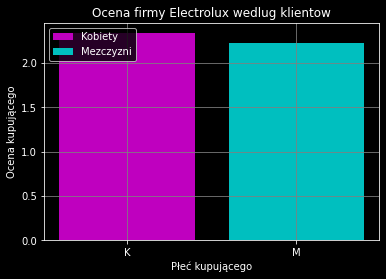

Ilość klientów ELECTROLUX:
   Plec  Liczba
0    M      27
1  bd.      11
2    K       9


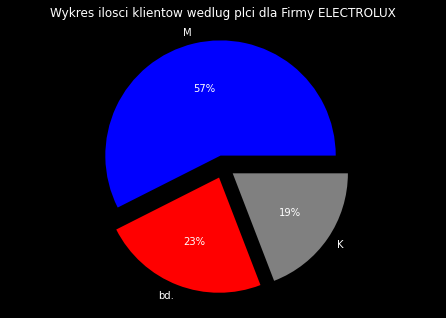

In [15]:
df_fm = df[['Marka', 'Płeć kupującego', 'Ocena']]
d_Electrolux = df_fm[df_fm ['Marka'] == 'Electrolux']

d_male = d_Electrolux[d_Electrolux ['Płeć kupującego'] == 'M']
d_female = d_Electrolux[d_Electrolux['Płeć kupującego'] == 'K']
print(d_male)
print(d_female)
d_male.to_csv(path_or_buf=f"{DATA}ELECTROLUX_male_ocena.csv", sep=",") #zapis do pliku csv
d_female.to_csv(path_or_buf=f"{DATA}ELECTROLUX_female_ocena.csv", sep=",") #zapis do pliku csv

#Średnia ocena klientow
sr_k = d_female['Ocena'].mean()
sr_m = d_male['Ocena'].mean()
print('Średnia ocena firmy wedlug kobiet:', sr_k)
print('Średnia ocena firmy wedlug mezczyzn:', sr_m)


# #Wykres dla Electrolux
plt.bar(d_female['Płeć kupującego'], d_female['Ocena'].mean(),color = 'm', label = 'Kobiety')
plt.bar(d_male['Płeć kupującego'], d_male['Ocena'].mean(), color = 'c', label = 'Mezczyzni')

plt.title("Ocena firmy Electrolux wedlug klientow")
plt.ylabel("Ocena kupującego")
plt.xlabel("Płeć kupującego")
plt.grid(color = 'grey')
plt.legend()
plt.show()


#Wykres od ilosci osób
#Ilość wszystkich klientów
plec_ = d_Electrolux['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów ELECTROLUX:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}ELECTROLUX_ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla Firmy ELECTROLUX')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'

***Marka Samsung*** 

*Ilość klientów ze względu na płęć*

       Marka Płeć kupującego  Ocena
24   Samsung               M    2.0
110  Samsung               M    2.0
174  Samsung               M    1.5
234  Samsung               M    3.5
292  Samsung               M    4.0
407  Samsung               M    3.0
442  Samsung               M    1.0
       Marka Płeć kupującego  Ocena
18   Samsung               K    3.0
39   Samsung               K    5.0
213  Samsung               K    1.5
311  Samsung               K    1.5
373  Samsung               K    3.5
Średnia ocena firmy wedlug kobiet: 2.9
Średnia ocena firmy wedlug mezczyzn: 2.4285714285714284


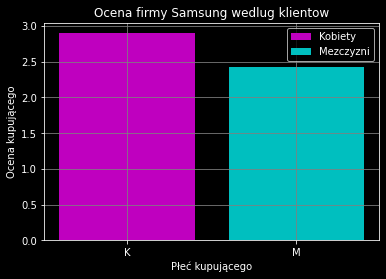

Ilość klientów Samsung:
   Plec  Liczba
0    M       7
1    K       5
2  bd.       2


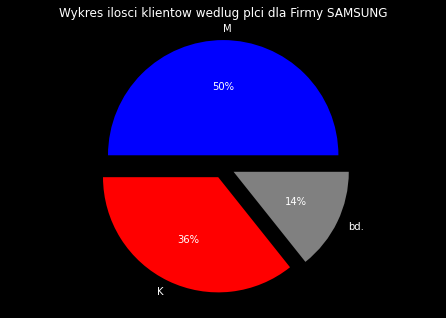

In [16]:
df_fm = df[['Marka', 'Płeć kupującego', 'Ocena']]
d_Samsung = df_fm[df_fm ['Marka'] == 'Samsung']

d_male = d_Samsung[d_Samsung ['Płeć kupującego'] == 'M']
d_female = d_Samsung[d_Samsung['Płeć kupującego'] == 'K']
print(d_male)
print(d_female)
d_male.to_csv(path_or_buf=f"{DATA}SAMSUNG_male_ocena.csv", sep=",") #zapis do pliku csv
d_female.to_csv(path_or_buf=f"{DATA}SAMSUNG_female_ocena.csv", sep=",") #zapis do pliku csv

#Średnia ocena klientow
sr_k = d_female['Ocena'].mean()
sr_m = d_male['Ocena'].mean()
print('Średnia ocena firmy wedlug kobiet:', sr_k)
print('Średnia ocena firmy wedlug mezczyzn:', sr_m)


# #Wykres dla Samsung
plt.bar(d_female['Płeć kupującego'], d_female['Ocena'].mean(),color = 'm', label = 'Kobiety')
plt.bar(d_male['Płeć kupującego'], d_male['Ocena'].mean(), color = 'c', label = 'Mezczyzni')

plt.title("Ocena firmy Samsung wedlug klientow")
plt.ylabel("Ocena kupującego")
plt.xlabel("Płeć kupującego")
plt.grid(color = 'grey')
plt.legend()
plt.show()


#Wykres od ilosci osób
#Ilość wszystkich klientów
plec_ = d_Samsung['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów Samsung:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}SAMSUNG_ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla Firmy SAMSUNG')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'

***Marka Dyson*** 

*Ilość klientów ze względu na płęć*

     Marka Płeć kupującego  Ocena
48   Dyson               M    3.0
94   Dyson               M    4.0
104  Dyson               M    5.0
121  Dyson               M    1.0
128  Dyson               M    2.0
181  Dyson               M    3.0
206  Dyson               M    1.5
228  Dyson               M    4.0
241  Dyson               M    3.5
258  Dyson               M    2.0
272  Dyson               M    2.5
301  Dyson               M    4.5
303  Dyson               M    1.0
339  Dyson               M    2.0
430  Dyson               M    4.0
439  Dyson               M    3.0
     Marka Płeć kupującego  Ocena
51   Dyson               K    1.5
105  Dyson               K    2.0
138  Dyson               K    2.0
140  Dyson               K    0.0
211  Dyson               K    2.0
232  Dyson               K    3.0
233  Dyson               K    2.5
276  Dyson               K    1.5
304  Dyson               K    5.0
379  Dyson               K    1.5
402  Dyson               K    2.0
446  Dyson    

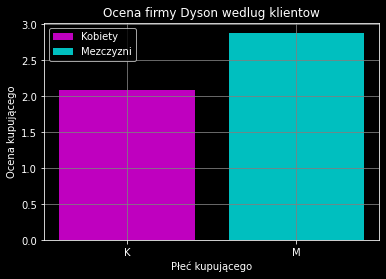

Ilość klientów Dyson:
   Plec  Liczba
0    M      16
1    K      12
2  bd.       6


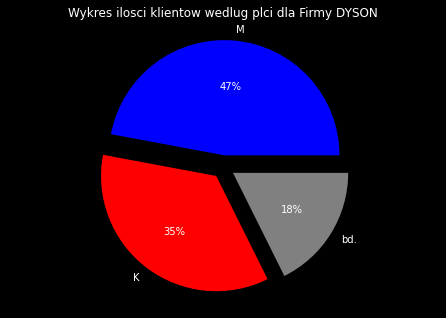

In [17]:
df_fm = df[['Marka', 'Płeć kupującego', 'Ocena']]
d_Dyson = df_fm[df_fm ['Marka'] == 'Dyson']

d_male = d_Dyson[d_Dyson ['Płeć kupującego'] == 'M']
d_female = d_Dyson[d_Dyson['Płeć kupującego'] == 'K']
print(d_male)
print(d_female)
d_male.to_csv(path_or_buf=f"{DATA}DYSON_male_ocena.csv", sep=",") #zapis do pliku csv
d_female.to_csv(path_or_buf=f"{DATA}DYSON_female_ocena.csv", sep=",") #zapis do pliku csv

#Średnia ocena klientow
sr_k = d_female['Ocena'].mean()
sr_m = d_male['Ocena'].mean()
print('Średnia ocena firmy wedlug kobiet:', sr_k)
print('Średnia ocena firmy wedlug mezczyzn:', sr_m)


# #Wykres dla Dyson
plt.bar(d_female['Płeć kupującego'], d_female['Ocena'].mean(),color = 'm', label = 'Kobiety')
plt.bar(d_male['Płeć kupującego'], d_male['Ocena'].mean(), color = 'c', label = 'Mezczyzni')

plt.title("Ocena firmy Dyson wedlug klientow")
plt.ylabel("Ocena kupującego")
plt.xlabel("Płeć kupującego")
plt.grid(color = 'grey')
plt.legend()
plt.show()


#Wykres od ilosci osób
#Ilość wszystkich klientów
plec_ = d_Dyson['Płeć kupującego'].value_counts().rename_axis('Plec').reset_index(name='Liczba')
print('Ilość klientów Dyson:\n', plec_)
plec_.to_csv(path_or_buf=f"{DATA}DYSON_ilosc_klientow_plec.csv", sep=",") #zapis do pliku csv


#Wyznaczanie danych dla danej plci
labels = plec_.Plec
values = plec_.Liczba

#Tworzenie wykresu
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(values, labels = labels, autopct='%1.0f%%', explode=(0.1, 0.1, 0.1), colors = ['Blue', 'red', 'grey'] )
plt.title('Wykres ilosci klientow wedlug plci dla Firmy DYSON')
plt.show()
#autopct - procent
#explode=(0.1, 0.1, 0.1) - odchylenie danych 'kawalkow'